# Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn, optim

from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import roc_auc_score

## Create sample

In [2]:
sample_size = 1000

X = torch.rand(sample_size, 2)
Y = torch.tensor([
    np.random.choice([0, 1], p = [1-p.item(), p.item()]) 
    for p in X.mean(1)
])

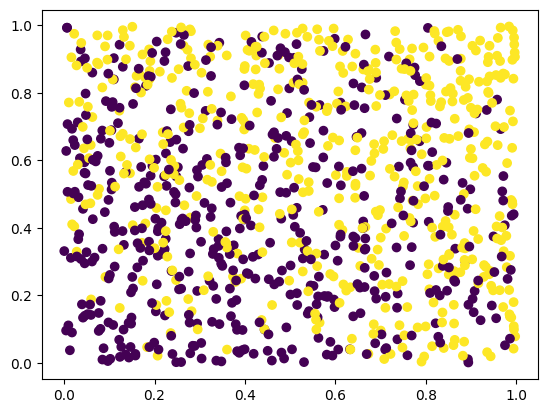

In [3]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

## Model

In [4]:
network = nn.Sequential(
    nn.Linear(in_features= 2, out_features = 1, bias = False),
    nn.Sigmoid()
)

## Fit model

In [5]:
data_loder = DataLoader(
    TensorDataset(X, Y), batch_size = 100
)
optimizer = optim.Adam(network.parameters(), lr = 0.001)
loss = nn.CrossEntropyLoss()

loss_values = []
for i in range(1000):
    for x, y in data_loder:
        optimizer.zero_grad()
        predict = network(x)
        loss_val = loss(predict.ravel(), y.float())
        loss_values.append(loss_val.item())
        loss_val.backward()
        optimizer.step()

## $ROC_{auc}$

In [10]:
roc_auc_score(Y.tolist(), network(X).ravel().tolist())

0.7214294001624318